In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

import warnings
warnings.filterwarnings('ignore')

print("Core libraries imported successfully !")

Core libraries imported successfully !


In [2]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers, losses, metrics

#Version Check
print(f"TensorFlow Version:{tf.__version__}")
print(f"Keras Version:{keras.__version__}")
print(f"Keras Backend:{keras.backend.backend()}")

#Set seed
np.random.seed(42)
tf.random.set_seed(42)

print("n✓ Keras is ready to use !")

TensorFlow Version:2.19.0
Keras Version:3.10.0
Keras Backend:tensorflow
n✓ Keras is ready to use !


In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test)=mnist.load_data()

print("Dataset loaded successfully !")
print(f"\nTraining Samples:{X_train.shape[0]}")
print(f"\nTesting Samples:{X_test.shape[0]}")
print(f"Image Shape:{X_train.shape[1:]}")
print(f"Number of Classes:{len(np.unique(y_train))}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset loaded successfully !

Training Samples:60000

Testing Samples:10000
Image Shape:(28, 28)
Number of Classes:10


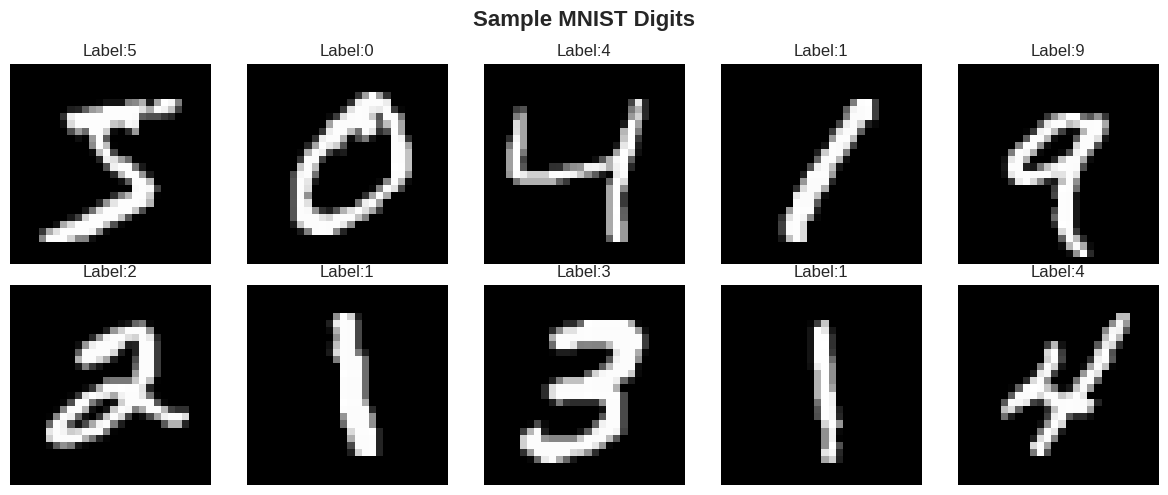

Each image is 28x28 pixel grayscale image of a handwritten digit (0-9)


In [4]:
#Visualize some samples
fig, axes=plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits', fontsize=16, fontweight='bold')
for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(f"Label:{y_train[i]}")
  ax.axis('off')

plt.tight_layout()
plt.show()

print("Each image is 28x28 pixel grayscale image of a handwritten digit (0-9)")

In [5]:
X_train_flat=X_train.reshape(X_train.shape[0], -1)
X_test_flat=X_test.reshape(X_test.shape[0], -1)

print(f"Original Shape:{X_train.shape}")
print(f"Flattened Shape:{X_train_flat.shape}")
print(f"Each image is now a vector of {X_train_flat.shape[1]} pixels")

Original Shape:(60000, 28, 28)
Flattened Shape:(60000, 784)
Each image is now a vector of 784 pixels


In [6]:
X_train_norm=X_train_flat.astype('float32')/255.0
X_test_norm=X_test_flat.astype('float32')/255.0

print(f"Original pixel range:[{X_train_flat.min()}, {X_train_flat.max()}]")
print(f"Normalized pixel range:[{X_train_norm.min()}, {X_train_norm.max():.2f}]")
print("\n✓ Data is Normalized successfully")

Original pixel range:[0, 255]
Normalized pixel range:[0.0, 1.00]

✓ Data is Normalized successfully


In [7]:
# Convert labels to categorical (One Hot Encoding)
from keras.utils import to_categorical

print(f"Original Labels:{y_train[:5]}")

y_train_cat=to_categorical(y_train, num_classes=10)
y_test_cat=to_categorical(y_test, num_classes=10)

print(f"One Hot Encoded label for '{y_train[0]}':")
print(y_train_cat[0])
print(f"Label Shape:{y_train_cat.shape}")

Original Labels:[5 0 4 1 9]
One Hot Encoded label for '5':
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Label Shape:(60000, 10)


In [8]:
#Create a Sequential model

model=keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])

print("\nModel created successfully !")
print("\nLet's Examine architecture:")


Model created successfully !

Let's Examine architecture:


In [9]:
#View model architecture
model.summary()

print("\n💡 Key observations:")
print("- Total parameters: ~100K (these are learned during training)")
print("- Most parameters are in the first layer (784 inputs × 128 neurons)")
print("- Output layer has 10 neurons (one for each digit class)")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


💡 Key observations:
- Total parameters: ~100K (these are learned during training)
- Most parameters are in the first layer (784 inputs × 128 neurons)
- Output layer has 10 neurons (one for each digit class)


#Binary classification with iris dataset

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
#Load Data

iris=load_iris()
X=iris.data
y=iris.target

y_binary=(y!=0).astype('int')

print(f"Total Samples:{len(X)}")
print(f"Features:{iris.feature_names}")
print(f"\nClass Distribution:")
print(f"   Setosa:{np.sum(y_binary==0)}")
print(f"   Not Setosa:{np.sum(y_binary==1)}")

Total Samples:150
Features:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Class Distribution:
   Setosa:50
   Not Setosa:100


In [12]:
#Split Data

X_train_iris, X_test_iris, y_train_iris, y_test_iris=train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_iris=scaler.fit_transform(X_train_iris)
X_test_iris=scaler.transform(X_test_iris)

print(f"Training Samples:{len(X_train_iris)}")
print(f"Test Samples:{len(X_test_iris)}")
print("\n✓ Data prepared for binary classification")

Training Samples:120
Test Samples:30

✓ Data prepared for binary classification


In [18]:
#Build binary classification model

binary_model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4, )),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='binary_classifier')

binary_model.summary()
print("\n💡 Note: For binary classification, we use:")
print("   -Output neuron (instead of 2)")
print("   -sigmoid activation (outputs probability between 0 and 1)")

Model: "binary_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)


💡 Note: For binary classification, we use:
   -Output neuron (instead of 2)
   -sigmoid activation (outputs probability between 0 and 1)


In [19]:
#Compile the binary classification model

binary_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✓ Model compiled successfully!")
print("\nCompilation settings:")
print(f"  Optimizer: Adam")
print(f"  Loss: Binary Crossentropy")
print(f"  Metrics: Accuracy")

✓ Model compiled successfully!

Compilation settings:
  Optimizer: Adam
  Loss: Binary Crossentropy
  Metrics: Accuracy


In [21]:
#Train the binary classification model

history=binary_model.fit(
    X_train_iris,
    y_train_iris,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

print("\n✓ Training completed !")

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0265 - val_accuracy: 1.0000 - val_loss: 0.0210
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0198
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 1.0000 - val_loss: 0.0187
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 0.0177
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0210 - val_accuracy: 1.0000 - val_loss: 0.0167
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 1.0000 - val_loss: 0.0159
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0151
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0144


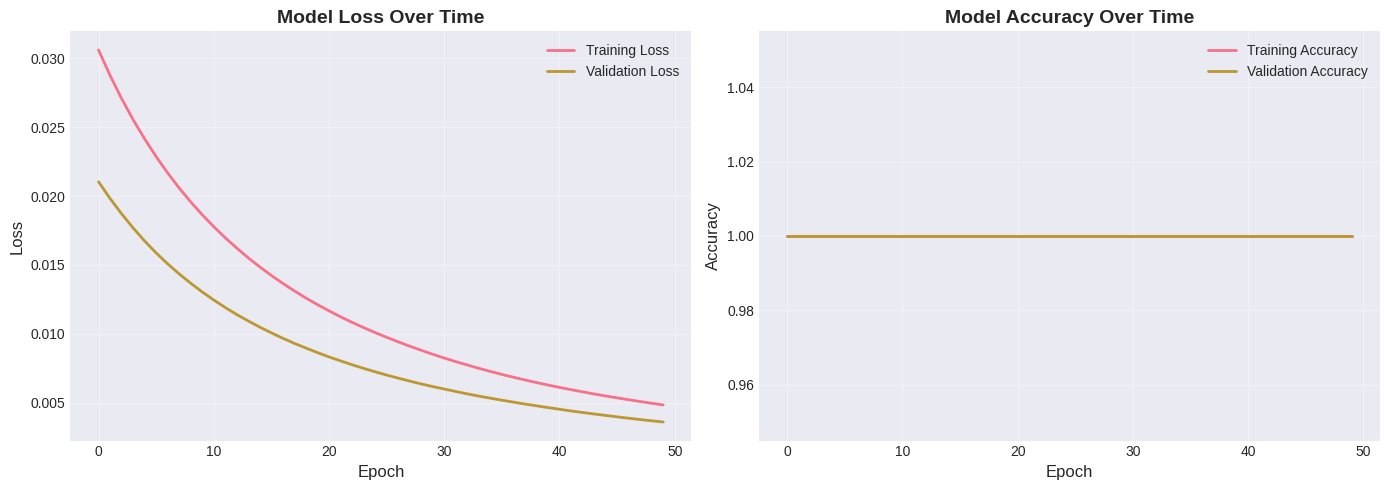

💡 Good signs:
  - Loss decreases over time
  - Training and validation curves are close (no overfitting)
  - Accuracy increases over time


In [24]:
# Visualize training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Good signs:")
print("  - Loss decreases over time")
print("  - Training and validation curves are close (no overfitting)")
print("  - Accuracy increases over time")

In [25]:
#Model evaluation and prediction
#Evaluate on test data

test_loss, test_accuracy=binary_model.evaluate(X_test_iris, y_test_iris, verbose=0)
print("Test Results:")
print(f" Loss:{test_loss:.4f}")
print(f" Accuracy:{test_accuracy:.4f}({test_accuracy*100:.2f})%")
print("\n✓ Model evaluation complete")

Test Results:
 Loss:0.0044
 Accuracy:1.0000(100.00)%

✓ Model evaluation complete


In [26]:
#Make predictions
predictions=binary_model.predict(X_test_iris, verbose=0)

print("Sample predictions(Probabilities):")
print(predictions[:5].flatten())

predicted_classes=(predictions>0.5).astype('int').flatten()

print("\nPredicted Classes")
print(predicted_classes[:10])

print("\nActual classes")
print(y_test_iris[:10])

Sample predictions(Probabilities):
[0.9964546  0.00651407 0.99999976 0.9968111  0.9995235 ]

Predicted Classes
[1 0 1 1 1 0 1 1 1 1]

Actual classes
[1 0 1 1 1 0 1 1 1 1]


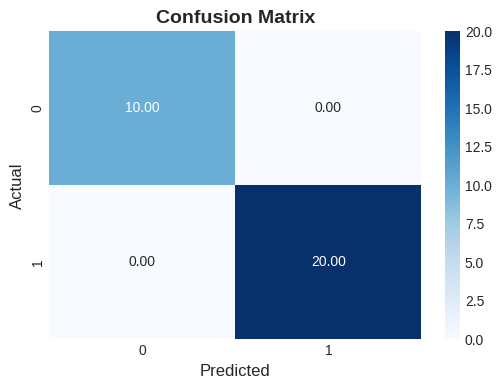

Classification Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  not_setosa       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
#confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, classification_report

#confusion_matrix
cm=confusion_matrix(y_test_iris, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f", cbar=True)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title("Confusion Matrix", fontsize=14, fontweight='bold')
plt.show()

#Detailed Metrics
print("Classification Report")
print(classification_report(y_test_iris, predicted_classes, target_names=['setosa', 'not_setosa']))

#Functional API

In [30]:
# Functional API approach
from keras import Input, Model

#Define input layer
inputs=Input(shape=(4, ), name='input_layer')

#Build architecture by calling layers on previous layer
x=layers.Dense(16, activation='relu', name='hidden_1')(inputs)
x=layers.Dense(8, activation='relu', name='hidden_2')(x)
outputs=layers.Dense(1, activation='sigmoid', name='output')(x)

#Create model
functional_model=Model(inputs=inputs, outputs=outputs, name='functional_binary_classifier')
functional_model.summary()

print("\n✓ Functional model created!")
print("\n💡 Notice: Same architecture, different syntax")

Model: "functional_binary_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)


✓ Functional model created!

💡 Notice: Same architecture, different syntax


##Sequential VS Functional API

Sequential

In [31]:
model=keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4,)),
    layers.Dense(1, activation='sigmoid')
])

Functional

In [32]:
inputs=Input(shape=(4,))
x=layers.Dense(16, activation='relu')(inputs)
outputs=layers.Dense(1, activation='sigmoid')(x)
model=Model(inputs=inputs, outputs=outputs)

In [35]:
#Compile and train the functional model
functional_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_function=functional_model.fit(
    X_train_iris, y_train_iris,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

#Evaluate
test_loss, test_accuracy=functional_model.evaluate(X_test_iris, y_test_iris, verbose=0)
print(f"Test Accuracy:{test_accuracy:.2f}")
print("\n Functional Model is trained successfully !")

Test Accuracy:1.00

 Functional Model is trained successfully !


In [38]:
#Example of multi input model
input_1=Input(shape=(10,), name='input_1')
input_2=Input(shape=(5,), name='input_2')

x1=layers.Dense(16, activation='relu')(input_1)
x2=layers.Dense(10, activation='relu')(input_2)

merged=layers.concatenate([x1, x2])

output=layers.Dense(1, activation='sigmoid')(merged)

multi_input_model=Model(inputs=[input_1, input_2], outputs=output)

print("Multimodel input architecture")
multi_input_model.summary()

Multimodel input architecture


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_1             │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_2             │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 16)        │        176 │ input_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 10)        │         60 │ input_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 26)        │          0 │ dense_17[0][0],   │
│ (Concatenate)       │                   │            │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1)         │         27 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 263 (1.03 KB)

 Trainable params: 263 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

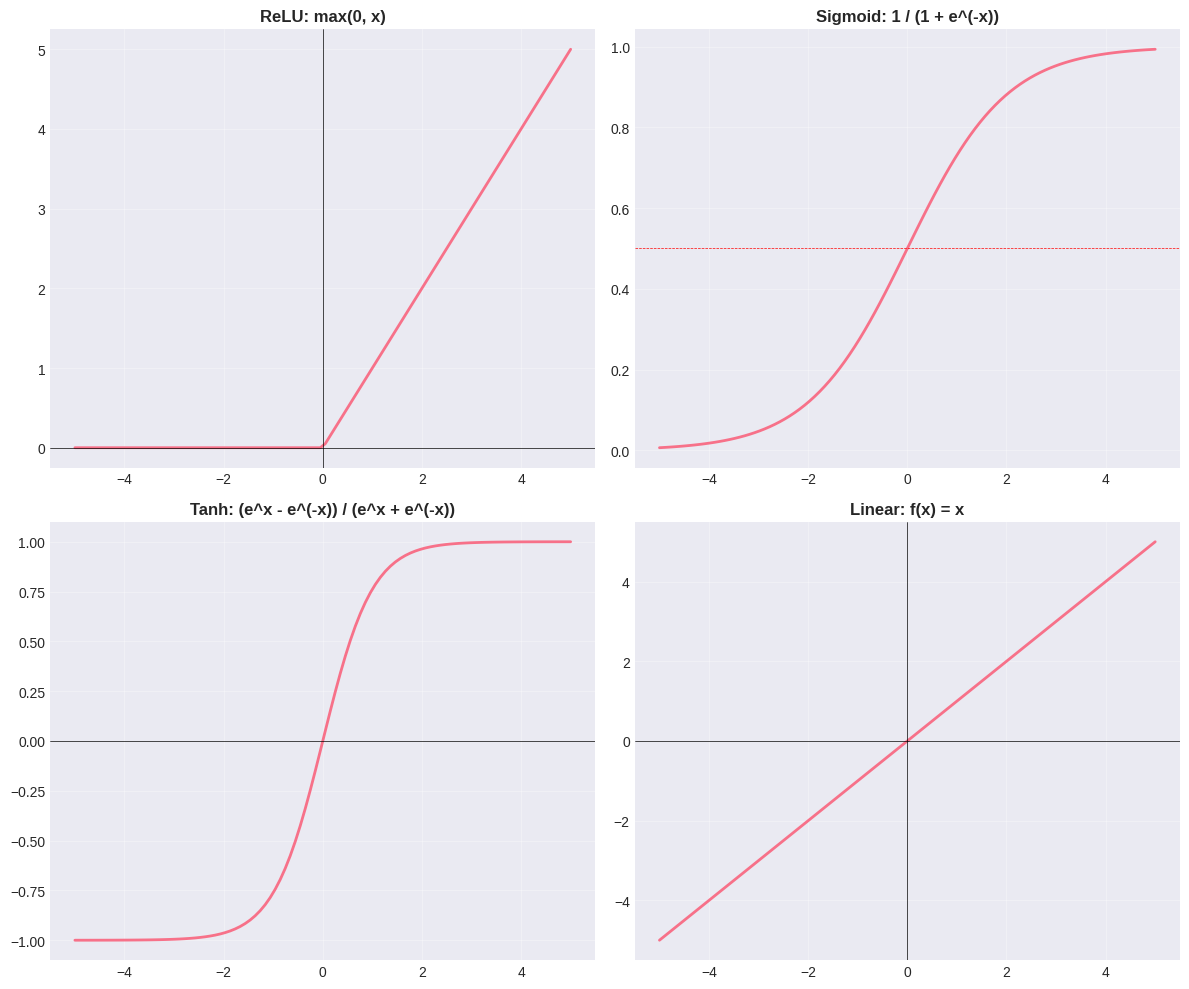

💡 Choose activation based on layer:
  - Hidden layers: ReLU (default choice)
  - Binary output: Sigmoid
  - Multi-class output: Softmax
  - Regression output: Linear (or none)


In [39]:
# Visualize activation functions
x = np.linspace(-5, 5, 100)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# ReLU
axes[0, 0].plot(x, np.maximum(0, x), linewidth=2)
axes[0, 0].set_title('ReLU: max(0, x)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='k', linewidth=0.5)
axes[0, 0].axvline(x=0, color='k', linewidth=0.5)

# Sigmoid
axes[0, 1].plot(x, 1 / (1 + np.exp(-x)), linewidth=2)
axes[0, 1].set_title('Sigmoid: 1 / (1 + e^(-x))', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0.5, color='r', linewidth=0.5, linestyle='--')

# Tanh
axes[1, 0].plot(x, np.tanh(x), linewidth=2)
axes[1, 0].set_title('Tanh: (e^x - e^(-x)) / (e^x + e^(-x))', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='k', linewidth=0.5)

# Linear
axes[1, 1].plot(x, x, linewidth=2)
axes[1, 1].set_title('Linear: f(x) = x', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("💡 Choose activation based on layer:")
print("  - Hidden layers: ReLU (default choice)")
print("  - Binary output: Sigmoid")
print("  - Multi-class output: Softmax")
print("  - Regression output: Linear (or none)")

In [41]:
#Model with dropout

model_with_dropout=keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='softmax')
], name='model_with_dropout')

model_with_dropout.summary()

print("\n💡 Dropout layers have no trainable parameters")
print("   They only activate during training, not during inference")

Model: "model_with_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,801 (425.00 KB)

 Trainable params: 108,801 (425.00 KB)

 Non-trainable params: 0 (0.00 B)


💡 Dropout layers have no trainable parameters
   They only activate during training, not during inference


In [43]:
# Model with Batch Normalization
model_with_bn=keras.Sequential([
    layers.Dense(128, input_shape=(784, )),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1, activation='softmax')
], name='model_with_batchnorm')

model_with_bn.summary()

print("\n💡 BatchNormalization has trainable parameters (gamma and beta)")
print("   It learns the optimal normalization for each layer")

Model: "model_with_batchnorm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,569 (428.00 KB)

 Trainable params: 109,185 (426.50 KB)

 Non-trainable params: 384 (1.50 KB)


💡 BatchNormalization has trainable parameters (gamma and beta)
   It learns the optimal normalization for each layer


In [46]:
#Advanced model with multiple techniques

model_advanced=keras.Sequential([
    layers.Dense(128, input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Dense(64),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(10, activation='softmax')
], name='model_advanced')

model_advanced.summary()


print("\n✓ This model combines:")
print("  - Batch Normalization (faster training, regularization)")
print("  - Dropout (prevent overfitting)")
print("  - ReLU activation (non-linearity)")

Model: "model_advanced"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)


✓ This model combines:
  - Batch Normalization (faster training, regularization)
  - Dropout (prevent overfitting)
  - ReLU activation (non-linearity)
